In [7]:
"""
Matrix 15x15 with two letters:
- "I" drawn using EVEN numbers.
- "B" drawn using PRIME numbers.
- Background filled with ODD COMPOSITE numbers to visually "hide" the letters.

Reproducible and self-contained.
"""

import numpy as np

rng = np.random.default_rng(42)


# --- helpers ---
def is_prime(n: int) -> bool:
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    d = 3
    while d * d <= n:
        if n % d == 0:
            return False
        d += 2
    return True


# pools
even_pool = np.array([n for n in range(2, 100) if n % 2 == 0])
prime_pool = np.array([n for n in range(2, 100) if is_prime(n)])
# odd composite numbers (not prime, not even, >1)
oddcomp_pool = np.array([n for n in range(3, 100, 2) if not is_prime(n)])

# --- canvas ---
H, W = 15, 15
M = rng.choice(oddcomp_pool, size=(H, W))  # background: odd composite


# Coordinate helper (row, col) with 0-based indexing
def put(vals, coords):
    """Place random values from `vals` at integer coordinates `coords`."""
    rr, cc = zip(*coords)
    M[tuple(rr), tuple(cc)] = rng.choice(vals, size=len(coords))


# --- draw "I" with even numbers (left side) ---
# Use a simple blocky "I": top bar, vertical stem, bottom bar
top_row, bottom_row = 2, 12  # keep margins
left_col, right_col = 1, 3
stem_col = 2

I_coords = []
# top bar
I_coords += [(top_row, c) for c in range(left_col, right_col + 1)]
# bottom bar
I_coords += [(bottom_row, c) for c in range(left_col, right_col + 1)]
# vertical stem
I_coords += [(r, stem_col) for r in range(top_row, bottom_row + 1)]

put(even_pool, I_coords)

# --- draw "B" with primes (right side) ---
# Spine + two bowls (top and bottom) approximated with block pixels
spine_col = 10
right_edge = 12
top, mid, bot = 2, 7, 12

B_coords = []
# vertical spine
B_coords += [(r, spine_col) for r in range(top, bot + 1)]
# top horizontal
B_coords += [(top, c) for c in range(spine_col, right_edge + 1)]
# mid horizontal (waist)
B_coords += [(mid, c) for c in range(spine_col, right_edge)]
# bottom horizontal
B_coords += [(bot, c) for c in range(spine_col, right_edge + 1)]
# right edges of bowls
B_coords += [(r, right_edge) for r in range(top + 1, mid)]
B_coords += [(r, right_edge) for r in range(mid + 1, bot)]

put(prime_pool, B_coords)


# --- sanity checks (optional) ---
def all_in_pool(vals, coords):
    rr, cc = zip(*coords)
    flat = M[tuple(rr), tuple(cc)].ravel().tolist()
    return all(v in vals for v in flat)


assert all_in_pool(set(even_pool.tolist()), I_coords), "I must be even numbers"
assert all_in_pool(set(prime_pool.tolist()), B_coords), "B must be primes"

# Background should be odd composite (not even, not prime)
for r in range(H):
    for c in range(W):
        if (r, c) in I_coords or (r, c) in B_coords:
            continue
        v = M[r, c]
        assert v % 2 == 1 and not is_prime(v), "Background must be odd composite"

# --- pretty print ---
np.set_printoptions(linewidth=200, formatter={"int": lambda x: f"{x:02d}"})
print(M)

[[21 85 75 51 51 91 21 77 33 21 63 99 81 85 77]
 [85 57 25 87 55 57 49 27 95 85 75 51 87 63 55]
 [55 30 84 58 93 15 91 87 35 69 23 59 07 45 15]
 [99 55 02 75 85 81 27 49 55 57 59 63 11 81 77]
 [95 81 76 99 51 45 93 49 15 55 53 27 19 25 77]
 [55 45 50 65 75 95 51 27 87 69 05 21 89 85 87]
 [51 87 72 49 93 39 33 77 69 25 67 27 97 09 85]
 [85 85 66 55 77 35 85 63 55 57 59 05 25 35 21]
 [51 75 44 55 91 65 15 85 65 69 71 63 47 63 85]
 [39 69 32 45 51 99 33 35 51 99 03 09 37 87 15]
 [91 39 62 39 51 75 25 63 57 85 11 75 23 51 51]
 [87 45 14 45 09 21 21 85 81 77 41 77 53 93 57]
 [95 54 58 46 57 55 27 49 33 39 11 47 71 49 95]
 [21 45 21 45 99 49 93 57 77 55 35 85 99 35 85]
 [35 77 85 55 81 35 15 21 55 93 25 55 77 33 81]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt


# --- Función para identificar primos ---
def is_prime(n: int) -> bool:
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True


# # Crear matriz aleatoria 15x15 con números entre 1 y 100
# np.random.seed(42)
# M = np.random.randint(1, 100, (15, 5))

# Máscaras lógicas
mask_even = M % 2 == 0  # pares
mask_prime = np.vectorize(is_prime)(M)  # primos

# --- Visualización ---
fig, ax = plt.subplots(figsize=(10, 6.7))
ax.matshow(np.ones_like(M), cmap="gray_r")  # fondo gris claro

# Mostrar números
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        val = M[i, j]
        color = "black"
        weight = "normal"
        if mask_even[i, j]:
            color = "black"
            weight = "normal"
        if mask_prime[i, j]:
            color = "black"
            weight = "normal"
        ax.text(
            j, i, f"{val:2d}", va="center", ha="center", color=color, fontweight=weight
        )

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Matriz 15x15", fontsize=18)

plt.savefig("mision01.png", dpi=300, bbox_inches="tight")
plt.close()

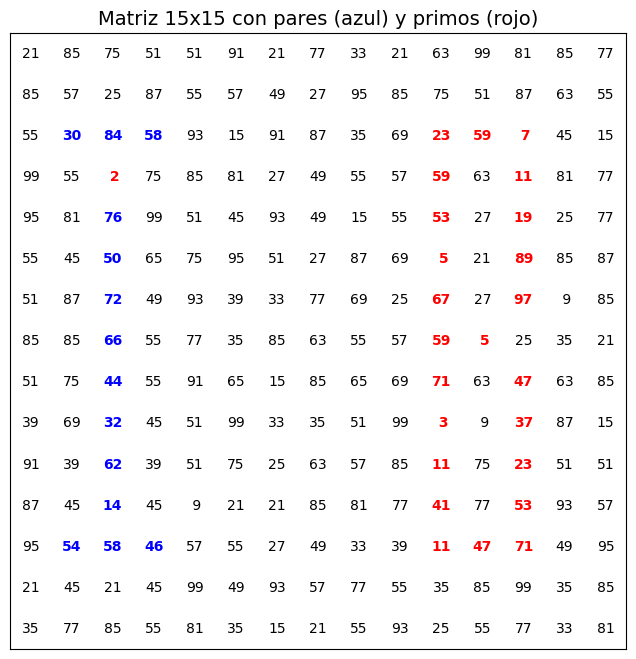

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# --- Función para identificar primos ---
def is_prime(n: int) -> bool:
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True


# # Crear matriz aleatoria 15x15 con números entre 1 y 100
# np.random.seed(42)
# M = np.random.randint(1, 100, (15, 15))

# Máscaras lógicas
mask_even = M % 2 == 0  # pares
mask_prime = np.vectorize(is_prime)(M)  # primos

# --- Visualización ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ones_like(M), cmap="gray_r")  # fondo gris claro

# Mostrar números
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        val = M[i, j]
        color = "black"
        weight = "normal"
        if mask_even[i, j]:
            color = "blue"
            weight = "bold"
        if mask_prime[i, j]:
            color = "red"
            weight = "bold"
        ax.text(
            j, i, f"{val:2d}", va="center", ha="center", color=color, fontweight=weight
        )

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Matriz 15x15 con pares (azul) y primos (rojo)", fontsize=14)
plt.show()

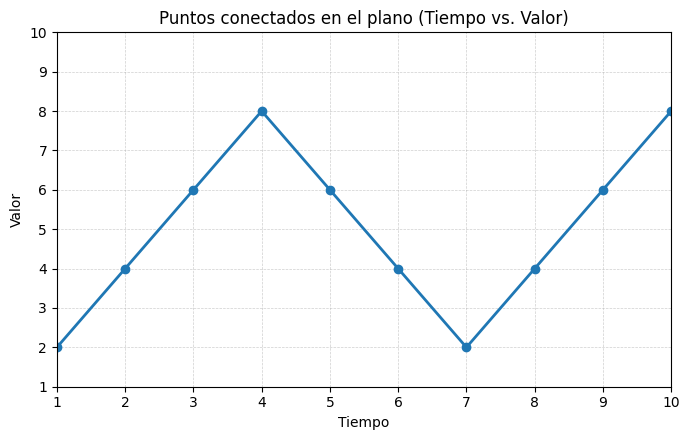

In [12]:
# Plotting the polyline defined by the coordinates
import matplotlib.pyplot as plt

# Data
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
v = [2, 4, 6, 8, 6, 4, 2, 4, 6, 8]

# Figure
plt.figure(figsize=(7, 4.5))  # one figure only; fast to render
plt.plot(t, v, marker="o", linewidth=2)
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Puntos conectados en el plano (Tiempo vs. Valor)")
plt.tight_layout()
plt.show()